In [6]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
sns.set_theme()

In [3]:
multi_level_rmse_folder = "/Users/essiezhang/Desktop/temp/2022-4-27/multi-level/rmse"

In [ ]:
multi_level_rmse = []

In [11]:
rmse_subfiles = os.listdir(multi_level_rmse_folder)
rmse_subfiles.sort()

In [13]:
for f in rmse_subfiles:
    path = os.path.join(multi_level_rmse_folder, f)
    rmse = np.load(path, allow_pickle=True)
    multi_level_rmse.extend(rmse)

In [15]:
len(multi_level_rmse)

63030

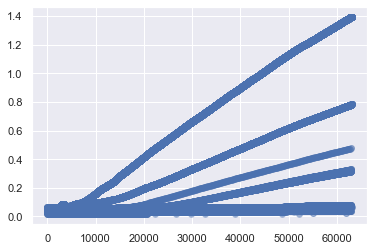

In [18]:
x = range(0, len(multi_level_rmse), 1)
plt.scatter(x=x, y=multi_level_rmse, alpha=0.3)

In [23]:
np.average(multi_level_rmse)

0.46344302741875343

In [21]:
single_level_rmse_folder = "/Users/essiezhang/Desktop/temp/2022-4-27/single-level/rmse"
single_level_rmse = []
rmse_subfiles_single = os.listdir(single_level_rmse_folder)
rmse_subfiles_single.sort()
for f in rmse_subfiles_single:
    path = os.path.join(single_level_rmse_folder, f)
    rmse = np.load(path, allow_pickle=True)
    single_level_rmse.extend(rmse)

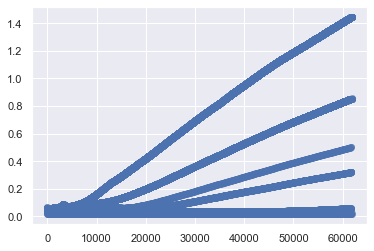

In [22]:
x = range(0, len(single_level_rmse), 1)
plt.scatter(x=x, y=single_level_rmse, alpha=0.3)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


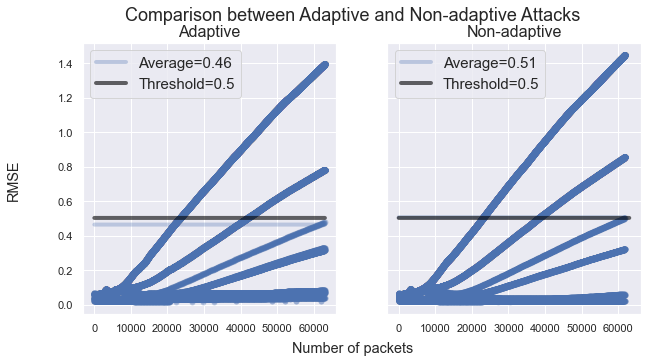

In [50]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 5))
fig.suptitle("Comparison between Adaptive and Non-adaptive Attacks", fontsize=18)
threshold = 0.5020311945051722

# adaptive
x_multi_level = range(0, len(multi_level_rmse), 1)
sns.scatterplot(x=x_multi_level, y=multi_level_rmse, alpha=0.3, ax=ax1, linewidth=0)
avg_rmse_multi_level = np.mean(multi_level_rmse)
ax1.plot(x_multi_level, [avg_rmse_multi_level] * len(x_multi_level),
         alpha=0.3,
         linewidth=4,
         label=f"Average={round(avg_rmse_multi_level, 2)}")
ax1.plot(x_multi_level, [threshold] * len(x_multi_level),
         c="#000000",
         alpha=0.6,
         linewidth=4,
         label=f"Threshold={round(threshold, 2)}")
ax1.set_title("Adaptive", fontsize=16)
plt.legend()

# non-adaptive
x_single_level = range(0, len(single_level_rmse), 1)
sns.scatterplot(x=x_single_level, y=single_level_rmse, alpha=0.3, ax=ax2, linewidth=0)
avg_rmse_single_level = np.mean(single_level_rmse)
ax2.plot(x_single_level, [avg_rmse_single_level] * len(x_single_level),
         alpha=0.3,
         linewidth=4,
         label=f"Average={round(avg_rmse_single_level, 2)}")
ax2.plot(x_multi_level, [threshold] * len(x_multi_level),
         c="#000000",
         alpha=0.6,
         linewidth=4,
         label=f"Threshold={round(threshold, 2)}")
ax2.set_title("Non-adaptive", fontsize=16)


fig.supxlabel('Number of packets')
fig.supylabel('RMSE')

ax1.legend(loc=2, prop={'size': 15})
ax2.legend(loc=2, prop={'size': 15})

plt.savefig("Outputs/Figures/IoT_different_levs/misc./adaptive.png", dpi=500)

In [24]:
np.average(single_level_rmse)

0.5059884582611021